### plot widing numbers for a circle map


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here is the map
$$\theta_{n+1}=  \theta_n + \Omega - \frac{K}{2\pi} \sin (2 \pi \theta_n) $$

with $\theta_n \in [0,1]$.

Winding number is 
$$w = \lim_{n \to \infty} \sum_{i=0}^n \frac{\theta_i}{n}$$

In [10]:



# function without moding
def cf(theta,Omega,K):
        twopi = 2.0*np.pi
        x = theta + Omega - (K/twopi)*np.sin(twopi*theta)
        return x

# circle map is theta_{n+1} = theta_n + Omega  - K/(2pi)*sin(2 pi theta_n)
# mod 1
def circlemap(theta,Omega,K):
        x = cf(theta,Omega,K)
        return np.fmod(x,1.0)   # returned in [0,1)


# compute the winding number
# the winding number is lim n to infty sum theta_n/n
# don't use mod
# initial value of theta is theta0
# Omega, K are passed to circle map function cf
def winding(theta0,Omega,K,nit):
        theta = theta0
        for i in range(0,nit):  # range goes to n-1
            theta = cf(theta,Omega,K)    # no mods

        msum = (theta-theta0)/float(nit)
        return np.mod(msum,1.0)

In [12]:
# fill up a 2x2 array with winding numbers
# here X is Omega array
# and Y is K array
def fillwinding(X,Y):
        nr= len(X)
        nc= len(X[0])
        WW = X*0.0 + 0.0
        theta0 = 0.5
        for i in range(0,nr):
            for j in range(0,nc):
                xij = X[i][j]   # Omega
                yij = Y[i][j]   # K
                WW[i][j] = winding(theta0,xij,yij,200)
                        
        return WW

In [13]:
# make a mesh, note x,y are now 2d arrays containing all x values and all y values
ngrid = 200.0
xmax = 1.0   # x is omega
dx = xmax/ngrid
ymax = 2.0*np.pi  # y is K
dy = ymax/ngrid
X,Y = np.meshgrid(np.arange(0.0,xmax+dx,dx),np.arange(0.0,ymax+dy,dy))
WW = fillwinding(X,Y)



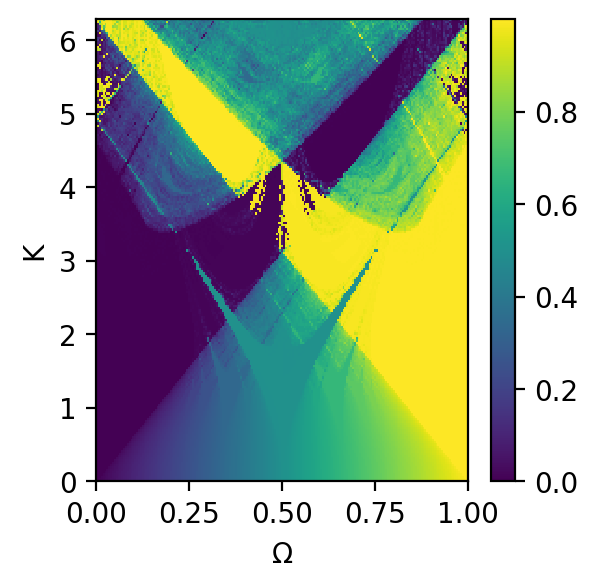

In [14]:
fig,ax = plt.subplots(1,1,figsize=(3,3) ,dpi=200)
ax.set_xlabel(r'$\Omega$')
ax.set_ylabel('K')
ax.set_xlim([0,xmax])
ax.set_ylim([0,ymax])


# plot with color as an image:
cc = ax.pcolormesh(X,Y,WW)
plt.colorbar(cc)
